# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

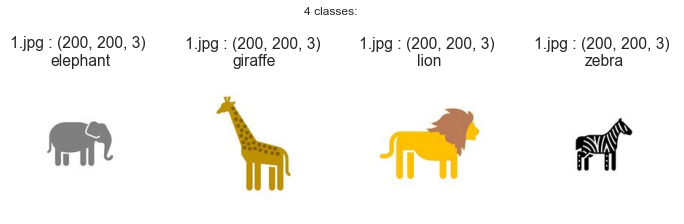

In [48]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
data_path = 'data/safari/training'

# Get the class names
classes = os.listdir(data_path)
classes.sort()

# Show the first image in each folder
fig = plt.figure(figsize=(12,4))
fig.suptitle(f"{len(classes)} classes:")
for i, sub_dir in enumerate(classes):
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes), i+1)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(f"{img_file} : {str(img_shape)} \n{classes[i]}")

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

> **Note**: There is no single "correct" solution. Sample solutions are provided in [05 - Safari CNN Solution (PyTorch).ipynb](05%20-%20Safari%20CNN%20Solution%20(PyTorch).ipynb) and [05 - Safari CNN Solution (TensorFlow).ipynb](05%20-%20Safari%20CNN%20Solution%20(TensorFlow).ipynb).

In [49]:
# Your Code to train a CNN model...
import tensorflow as tf
from tensorflow import keras
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.11.0
Keras version: 2.11.0


# Image preprocessing

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = img_shape[0:2]
batch_size = 30

print('Getting data...')
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

def prep_generators(subset_type):
    print(f"Preparing {subset_type} dataset...")
    return datagen.flow_from_directory(
        data_path,
        target_size = img_size,
        batch_size = batch_size,
        class_mode = 'categorical',
        subset = subset_type
    )

subset_types = ['training', 'validation']

train_generator, validation_generator = map(prep_generators, subset_types)

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting data...
Preparing training dataset...
Found 280 images belonging to 4 classes.
Preparing validation dataset...
Found 116 images belonging to 4 classes.
Data generators ready


# Define CNN

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

filters = 32
kernel_size = (6,6)
input_shape = train_generator.image_shape
activation = 'relu'
pool_size = (2, 2)
layers = 2

model = Sequential()

model.add(Conv2D(filters, kernel_size, input_shape=input_shape, activation=activation))
model.add(MaxPooling2D(pool_size=pool_size))

for i in range(layers):
    model.add(Conv2D(filters, kernel_size, activation=activation))
    model.add(MaxPooling2D(pool_size=pool_size))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 195, 195, 32)      3488      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 97, 97, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 92, 92, 32)        36896     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 41, 32)        36896     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 20, 20, 32)      

# Train the model

In [52]:
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs
)

Epoch 1/5
9/9 [==============================] - 15s 2s/step - loss: 1.3354 - accuracy: 0.3920 - val_loss: 0.8633 - val_accuracy: 0.8444
Epoch 2/5
9/9 [==============================] - 13s 1s/step - loss: 0.3530 - accuracy: 0.9185 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 3/5
9/9 [==============================] - 12s 1s/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 4/5
9/9 [==============================] - 12s 1s/step - loss: 5.7095e-04 - accuracy: 1.0000 - val_loss: 2.0699e-04 - val_accuracy: 1.0000
Epoch 5/5
9/9 [==============================] - 14s 2s/step - loss: 6.5768e-05 - accuracy: 1.0000 - val_loss: 2.8105e-06 - val_accuracy: 1.0000


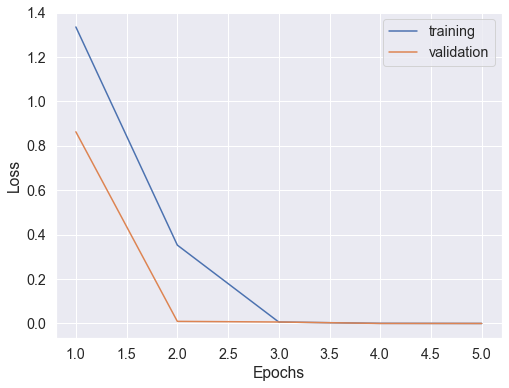

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1, num_epochs + 1)
traning_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig = plt.figure(figsize=(8,6))
plt.plot(epoch_nums, traning_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training', 'validation'], loc='best')

# Evaluate performance

1/1 [==============================] - 1s 514ms/step
Overall accuracy: 1.000


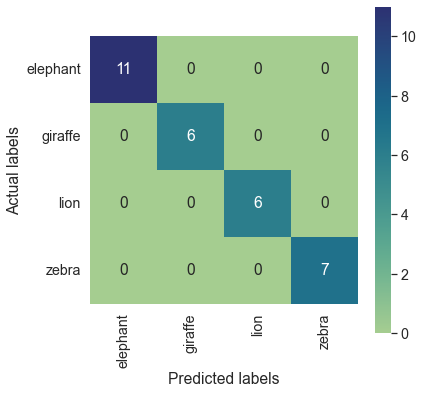

In [54]:
from scripts import plots
from sklearn.metrics import accuracy_score

X_test = validation_generator[0][0]
y_test = validation_generator[0][1]

class_probabilities = model.predict(X_test)

predictions = np.argmax(class_probabilities, axis=1)

true_labels = np.argmax(y_test, axis=1)

print(f"Overall accuracy: {accuracy_score(true_labels, predictions):.3f}")
plots.show_confusion_matrix(true_labels, predictions, classnames)

## Save your model

Add code below to save your model's trained weights.

In [55]:
# Code to save your model
import os

directory = 'models'
try:
    os.mkdir(directory)
except FileExistsError as err:
    print(err)
    pass

file_name = 'safari_classifier.h5'

path = os.path.join(directory, file_name)

model.save(path)
del model
print(f"Model saved as {file_name}")

[WinError 183] Cannot create a file when that file already exists: 'models'
Model saved as safari_classifier.h5


## Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

1/1 [==============================] - 0s 60ms/step


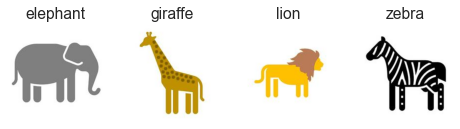

In [56]:
# Function to predict the class of an image
def predict_image(classifier, image: np.array):
    import numpy as np
    
    # Default value
    index = 0
    
    # !!Add your code here to predict an image class from your model!!
    image_features = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    image_features = image_features.astype('float32')
    image_features /= 255

    class_probabilities = classifier.predict(image_features)
    index = int(np.argmax(class_probabilities, axis=1)[0])
    # Return the predicted index
    return index


# Load your model
from tensorflow.keras import models
model = models.load_model(path)

# The images are in the data/shapes folder
test_data_path = 'data/safari/test'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))

for i, img_file in enumerate(os.listdir(test_data_path)):
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # Get the image class prediction
    index = predict_image(model, np.array(img))
    a=fig.add_subplot(1, len(classes), i+1)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])

Hopefully, your model predicted all four of the image classes correctly!